# <h1><center>*Predicting The Quality of Wine*</center></h1>

# Goals:

 - Identify what drives the quality of wine 
 - Build a model to best predict home values
 ___

# Imports

In [6]:
import pandas as pd
import numpy as np

import acquire as a
import prepare as p
import explore as e
import modeling as m

import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt 

import warnings
warnings.filterwarnings("ignore")

---------------------------------------------------------------------------------------------------------------

# Acquire

 - Our data was acquired from Data.world
 - CSV files were then saved into our project file
 - Each column represents a component of the wine
 - Combined dataset has 6497 rows, and 13 columns
 - Created function to acquire the data
 ---

# Prepare

- Combine both Red and White wine CSVs together
- Remove unnecessary white space(if any)
- Checked and removed nulls(if any)
- Split original dateset into 3 different sets: Train, Validate, Test
 
 
 
 _____

# Data Dictionary

| Target Variable |     Definition     |
| --------------- | ------------------ |
|      Quality      | Score of wine, scale between 0 - 10  |

| Feature  | Definition |
| ------------- | ------------- |
| Fixed acidity | Measures the level of acidity that doesn't change with storage or wine aging |
| Volatile acidity | Measures the amount of acetic acid in wine, responsible for vinegar-like smell  |
| Citric acid | Measures the amount of citric acid in wine, provides fresh and sour taste |
| Residual sugar | Measures the amount of residual sugar in wine, affects the wine's sweetness |
| Chlorides | Measures the amount of chloride ions in wine, contributes to wine's saltiness |
| Free sulfur dioxide | Measures the amount of free SO2 in wine, acts as a preservative | 
| Total sulfur dioxide | Measures the combined amount of free and bound SO2 in wine |
| Density | Measures the weight per unit volume of wine, affects wine's body and mouthfeel |
| pH | Measures the acidity level of wine, affects wine's taste and stability |
| Sulphates | Measures the amount of sulfur dioxide in wine, contributes to wine's preservation and taste |
| Alcohol | Measures the percentage of alcohol by volume in wine, affects wine's strength and flavor |


# A brief look at the data

# A summary of the data

# Explore

### *1. Will more bedrooms and bathrooms drive house value up?*

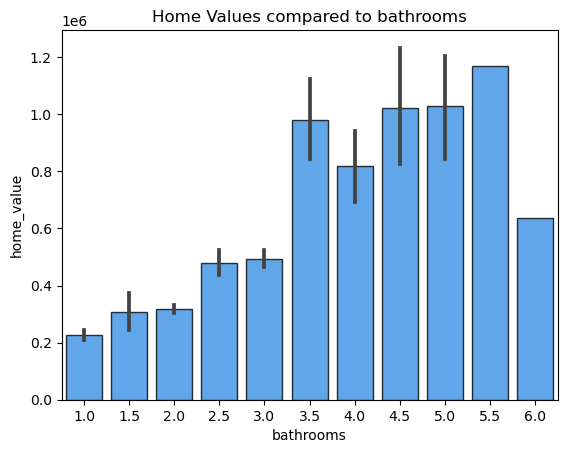

In [5]:
# a bar plot showing us bathrooms compared to their respective home prices
# q1

**Takeaways**

- As bedrooms and bathrooms increase in a home, it seems like the price of the home increase

____

### *2. Does lot size sqft increase home value?*

**Takeaways**

- It seems like as lot sqft goes up so does the price, but the correlation does not seem to be strong


--------

### *Is the mean of above average quality wine is equal to the mean of the overall average quality wine*

$H_o$: The mean of above average Quality wine is equal to the mean of the overall average quality of wine.


$H_a$: The mean of above average Quality wine is not equal to the mean of the overall average quality of wine.

In [ ]:
def mean_quality():
    alpha= 0.5
    quality_avg= train.quality.mean()
    above_avg= train.quality > quality_avg

    t, p = stats.ttest_1samp(above_avg, quality_avg)
    t, p

    if p/2 > alpha:
        print("We fail to reject $H_{0}$")
    elif t < 0:
        print("We fail to reject $H_{0}$")
    else:
        print("We reject $H_{0}$")
mean_quality()

In [12]:
def qual_den():
    den= train.density
    qua= train.quality
    t, p = stats.ttest_ind(den, qua, equal_var=False)
    print("We are able to reject the Null Hypothesis", p < alpha)
    

In [13]:
qual_den()

TypeError: qual_den() missing 1 required positional argument: 'train'

**Takeaways**

- Based on the 1 sample t test, we are able to reject out null hypothesis. This shows that the mean of wine quality is not equal to the mean of the overall mean of wine quality.

**Ran a 1 Sample T test to show that the mean of above average wine is greater than the mean of overall quality** <br>

 - Alpha is .05


### *Does PH significantly affect each wine differently?*
$H_o$: PH does not significanlty affect each wine differntly 

$H_a$: PH does significanlty affect each wine differntly 

In [8]:
e.ph_quality()

NameError: name 'train' is not defined

**Takeaways**

- Based on the graph, we can infer that pH does not have a great affect on the each Type of wine and its Quality.

# Exploration Summary

**- Bedrooms, bathrooms, lot sqft, transaction month, and county were found to be features that affect the home value**<br>
**- All features will be added for the modeling phase<br>**
**- County and transaction month seem to have the strongest influence.**
 
 ------

# Modeling 

- Goal is to minimize RMSE, so this will be my evaluation metric
- Ran 3 models including a Linear Regression , LassoLars, and a Polynomial 
- Before modeling scaled data and split
- I evaluated the models on train and validate data 
- The best performing model then was evaluated on test data subset

In [12]:
# wrote a function to scale my train, validate, and test data subsets
train_scaled, validate_scaled, test_scaled = m.mvp_scaled_data(train, validate, test)

In [13]:
# looking at one line of data in our scaled data
train_scaled.head(1)

,year_built,lot_sqft,logerror,long,lat,transaction_month,bathrooms,bedrooms,fips,sqft,home_value,county
6939,1970.0,0.107251,0.464608,0.742431,0.320542,2,2.5,3.0,6059.0,0.234005,447926.0,orange


In [14]:
# calling a function I wrote in my modeling.py to split my data in to X/y train, validate, test
X_train, y_train, X_validate,y_validate, X_test, y_test = m.splitting_subsets(train, train_scaled, validate_scaled, test_scaled)

In [15]:
# a look to 1st observation of our scaled, split, train subset
X_train.head(1)

,lot_sqft,logerror,long,lat,sqft,transaction_month_1,transaction_month_2,transaction_month_3,transaction_month_4,transaction_month_5,...,bathrooms_6.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,county_los angeles,county_orange,county_ventura
6939,0.107251,0.464608,0.742431,0.320542,0.234005,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
# called my function that in my modeling.py to demostrate my 3 best models and the baseline
# this includes the train rmse, validate rmse, and their difference 

m.best_models(X_train, y_train, X_validate, y_validate)

,model,train_rmse,validate_rmse,difference
0,linear_poly,217232.769547,216916.999520,315.770027
1,lasso,235229.309282,234879.860188,349.449094
2,linear,235254.807610,234900.102819,354.704791
3,baseline,298539.592323,298539.592323,0.000000


### Modeling Summary & Evaluation 

**The best performing model is the linear polynomial, so we tested the model with the test data**

In [17]:
# this is the best model and ran the test data on it
m.best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

,model,train_rmse,validate_rmse,test_rmse
0,linear_poly,217232.769547,216916.99952,217548.081236


------

<div class="alert alert-info">
    <header>
    <h2>Conclusions:</h2>    
</header>    
<dt>
    
Home value predictions were used by minimizing RMSE within our models. County and transaction month have proven to be the most valuable, but there is still room for improvement.
<br>        
Best Model's performance:

- My best model reduced the root mean squared error by 82500 dollars compared to the baseline results.

- RMSE 82493.41 dollars on in-sample (train), RMSE 84100.76 dollars on out-of-sample data (validate) and RMSE of 80897.87 dollars on the test data.</dt>

<header>
    <h2>Recommendations:</h2>        
</header>      
<dl>
    
- I would recommend using counties and transaction months to build models to predict home values. 

- I would also recommend collecting more data about the homes. For example, crime rates in the county, average salary within neighborhoods, and school rankings.
 

<header>
    <h2> Next Steps:</h2>       
</header> 
</dl>
    
- I would add more columns/features from the database to see if there are better relationships to help predict price.

- Consider adding different hyperparameters to models for better results.  

</div>